In [1]:
import pandas
import pylab as plt

pandas.read_csv('Wage.csv')
read_wage_data = pandas.read_csv('Wage.csv')
age = read_wage_data["age"]
wage = read_wage_data["wage"]

plt.xlabel("age")
plt.ylabel("wage")
plt.plot(age, wage, 'ro')

#there doesn't appear to be a linear relationship, there are patterns though, 
#such as the seperation of the clusters 

In [2]:
from sklearn.model_selection import train_test_split

age_train, age_test, wage_train, wage_test = train_test_split(read_wage_data["age"], read_wage_data["wage"], test_size = 0.20)

[0.68221383]


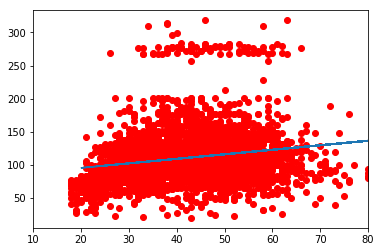

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = age_train.values.reshape(-1, 1)
y = wage_train
reg = LinearRegression().fit(X, y)
pred_y = wage_test.values.reshape(-1, 1)
pred_y = reg.predict(pred_y)

plt.plot(age, wage, 'ro')
plt.plot(wage_test, pred_y)
plt.xlim(10, 80)
print(reg.coef_)

In [4]:
X_test = age_test.values.reshape(-1, 1)
reg.score(X_test, pred_y)
#the R^2 tells us the loss of our model

-2.5508542147849647

In [5]:
from sklearn.preprocessing import PolynomialFeatures

X = age_train.values.reshape(-1, 1)
y = wage_train
poly = PolynomialFeatures(degree=4)
X = poly.fit_transform(X)
X_test = poly.fit_transform(age_test.values.reshape(-1, 1))
reg = LinearRegression().fit(X, y)
pred = reg.predict(X_test)
score = reg.score(X_test, pred)
print(score)
# MAKE SURE THIS IS ACCURATE

1.0


In [7]:
from sklearn.linear_model import Ridge

X = age_train.values.reshape(-1, 1)
y = wage_train
RReg = Ridge(alpha = 0.1)
poly = PolynomialFeatures(degree = 4)
X = poly.fit_transform(X)
RReg.fit(X, y)
print(RReg.coef_)
print(RReg.score(X, y))
#the coefficients are much smaller than the coefficient in exercise 4
#the score here is much smaller than the above scores

[ 0.00000000e+00  2.79742019e+01 -8.10062295e-01  1.05403571e-02
 -5.20046162e-05]
0.08490516323575836


/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.708286e-18
  overwrite_a=True).T
